In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

https://www.kaggle.com/datasets/mirichoi0218/insurance

In [75]:
df = pd.read_csv('data/insurance.csv')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [9]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [11]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\Rajitha\anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

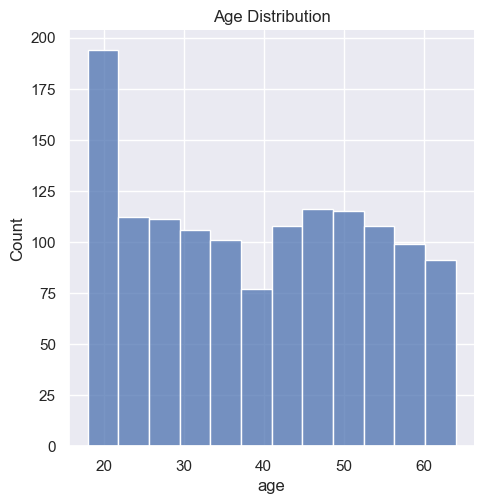

In [17]:
sns.set()
plt.figure(figsize=(10,6))
sns.displot(df['age'])
plt.title('Age Distribution')
plt.show()

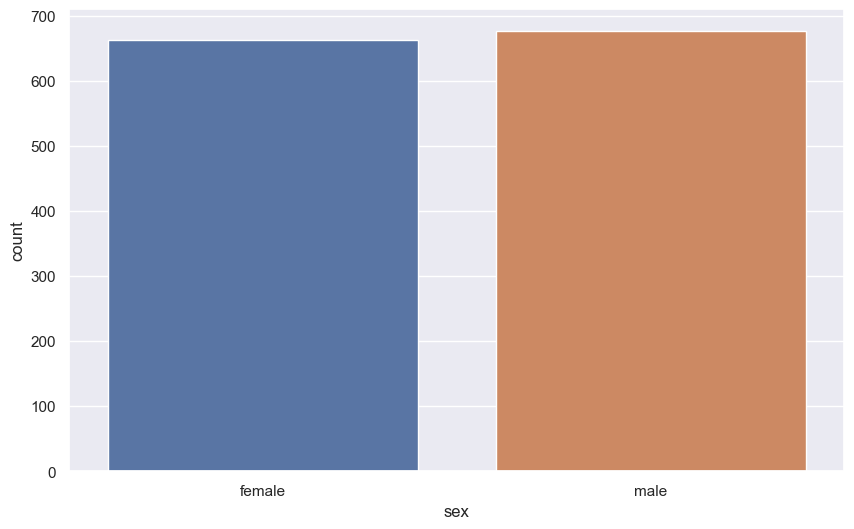

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex', data=df)
plt.show()

<Axes: xlabel='bmi', ylabel='Count'>

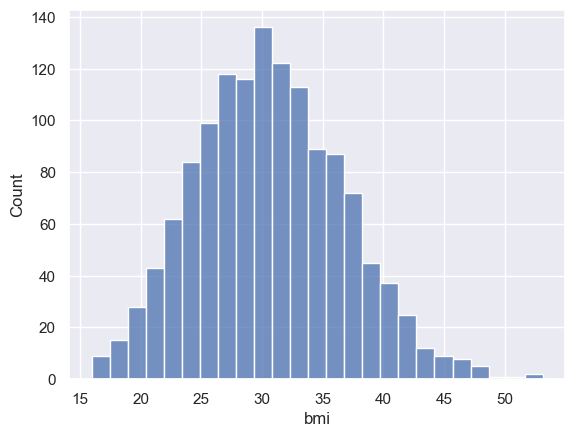

In [20]:
sns.histplot(df['bmi'])

<Axes: xlabel='children', ylabel='count'>

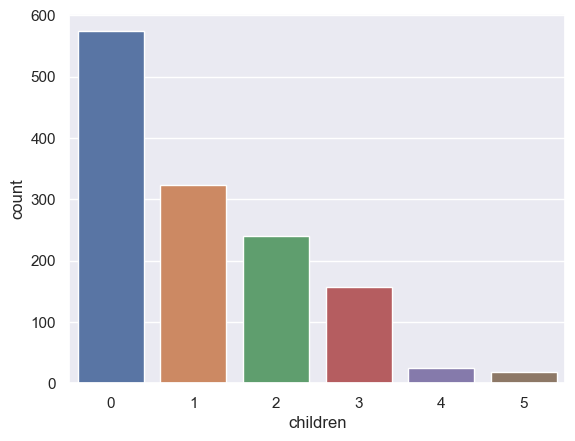

In [21]:
sns.countplot(x='children', data=df)

<Axes: xlabel='smoker', ylabel='count'>

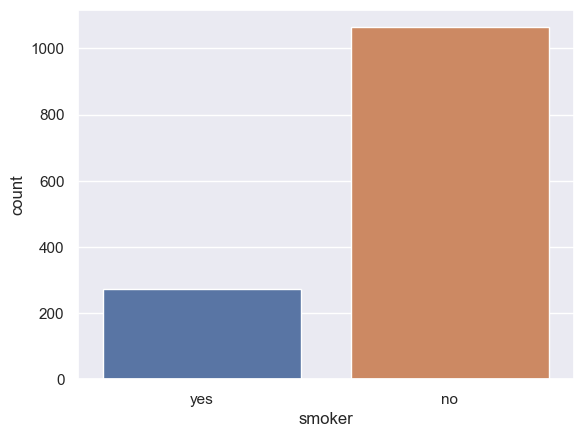

In [22]:
sns.countplot(x='smoker', data=df)

<Axes: xlabel='region', ylabel='count'>

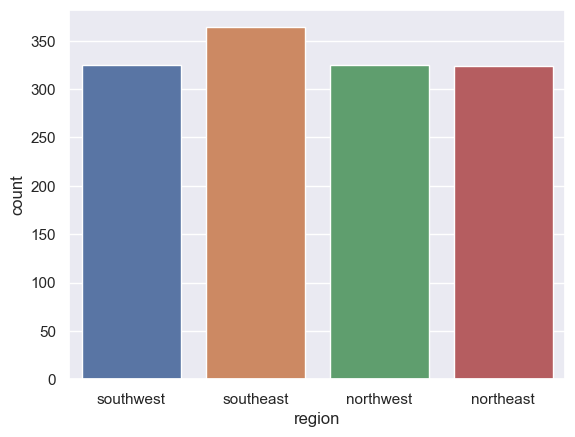

In [23]:
sns.countplot(x='region', data=df)

### Encoding Categorical Features

In [24]:
df.replace({'sex':{'male':0, 'female':1}}, inplace=True)

In [25]:
df.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

In [26]:
df.replace({'region':{'southwest':0, 'southeast':1, 'northwest':2, 'northeast':3}}, inplace=True)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


In [28]:
Y = df['charges']
X = df.drop(['charges'], axis=1)

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [54]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)
accuracy = metrics.r2_score(y_test, predicted)
print("Accuracy: ", accuracy)

Accuracy:  0.7445422986536503


In [74]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import scale

Xs = scale(X)
Ys = scale(Y)
x_train, x_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.2, random_state=2)
sgdr = SGDRegressor(penalty='elasticnet', alpha=0.001, max_iter=100000, tol=1e-6
    , eta0=0.001)
sgdr.fit(x_train, y_train)
predicted = sgdr.predict(x_test)

score = sgdr.score(x_test, y_test)
print(score)

0.744474975003077
